In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df= pd.read_csv('collected_data.csv')
df.head()

,Timestamp,Age,Gender,Family type,Total siblings (including yourself),Position among siblings,No. of sisters,No. of brothers,Area type,State,...,Highest level of education,Field of study,Father's education level,Mother's education level,Father's employment,Mother's employment,Annual family income,Housing situation,Chosen Envelope,Willingness to pay (in INR)
0,3/5/2024 15:37:28,21,Male,Extended Family (Includes relatives beyond par...,2,2,1,0,Urban,Tamil Nadu,...,Graduate,Industrial Engineering,Post Graduate,"Graduate Profession Degree eg. B.Tech,MBBS,LLB...",Self-employed/Business Owner,Salaried employee in Private Organisation,40.0,Own a House,Envelope 6,1000.0
1,3/5/2024 15:38:48,20,Female,Nuclear Family (Parents and children only),2,1,1,0,Urban,Chhattisgarh,...,Graduate,Industrial Engineering,Graduate,Graduate (Arts/Science),Salaried employee in Government Organisation,Unemployed,18.0,Own a House,Envelope 6,200.0
2,3/5/2024 15:39:31,19,Female,Nuclear Family (Parents and children only),2,1,1,0,Urban,Telangana,...,12th,Industrial Engineering,Post Graduate,"Post Graduate Professional Degree eg. MD,Mtec...",Salaried employee in Government Organisation,Self-employed/Business Owner,15.0,Own a House,Envelope 2,500.0
3,3/5/2024 15:39:33,20,Male,Nuclear Family (Parents and children only),1,1,0,0,Suburban,Maharashtra,...,12th,Industrial Engineering,Graduate,12th,Salaried employee in Government Organisation,Unemployed,800000.0,Own a House,Envelope 2,800.0
4,3/5/2024 15:39:46,22,Male,Extended Family (Includes relatives beyond par...,3,1,2,0,Suburban,Bihar,...,12th,Industrial Engineering,Post Graduate,10th,Salaried employee in Government Organisation,Unemployed,10.0,"I do not own a house, I live in a rented house...",Envelope 4,50.0


In [3]:
df.loc[df['Annual family income'] < 100000, 'Annual family income'] *= 100000


In [4]:
df.head()

,Timestamp,Age,Gender,Family type,Total siblings (including yourself),Position among siblings,No. of sisters,No. of brothers,Area type,State,...,Highest level of education,Field of study,Father's education level,Mother's education level,Father's employment,Mother's employment,Annual family income,Housing situation,Chosen Envelope,Willingness to pay (in INR)
0,3/5/2024 15:37:28,21,Male,Extended Family (Includes relatives beyond par...,2,2,1,0,Urban,Tamil Nadu,...,Graduate,Industrial Engineering,Post Graduate,"Graduate Profession Degree eg. B.Tech,MBBS,LLB...",Self-employed/Business Owner,Salaried employee in Private Organisation,4000000.0,Own a House,Envelope 6,1000.0
1,3/5/2024 15:38:48,20,Female,Nuclear Family (Parents and children only),2,1,1,0,Urban,Chhattisgarh,...,Graduate,Industrial Engineering,Graduate,Graduate (Arts/Science),Salaried employee in Government Organisation,Unemployed,1800000.0,Own a House,Envelope 6,200.0
2,3/5/2024 15:39:31,19,Female,Nuclear Family (Parents and children only),2,1,1,0,Urban,Telangana,...,12th,Industrial Engineering,Post Graduate,"Post Graduate Professional Degree eg. MD,Mtec...",Salaried employee in Government Organisation,Self-employed/Business Owner,1500000.0,Own a House,Envelope 2,500.0
3,3/5/2024 15:39:33,20,Male,Nuclear Family (Parents and children only),1,1,0,0,Suburban,Maharashtra,...,12th,Industrial Engineering,Graduate,12th,Salaried employee in Government Organisation,Unemployed,800000.0,Own a House,Envelope 2,800.0
4,3/5/2024 15:39:46,22,Male,Extended Family (Includes relatives beyond par...,3,1,2,0,Suburban,Bihar,...,12th,Industrial Engineering,Post Graduate,10th,Salaried employee in Government Organisation,Unemployed,1000000.0,"I do not own a house, I live in a rented house...",Envelope 4,50.0


In [5]:
cat_cols=[]
num_cols=[]
for it in df.columns:
    if(df[it].dtype=='object'):
        cat_cols.append(it)
    else:
        num_cols.append(it)

In [6]:
cat_cols

['Timestamp',
 'Gender',
 'Family type',
 'Area type',
 'State',
 'Institute name',
 'Highest level of education',
 'Field of study',
 "Father's education level",
 "Mother's education level",
 "Father's employment",
 "Mother's employment",
 'Housing situation',
 'Chosen Envelope']

In [7]:
num_cols

['Age',
 'Total siblings (including yourself)',
 'Position among siblings',
 'No. of sisters',
 'No. of brothers',
 'Annual family income',
 'Willingness to pay (in INR)']

In [8]:
max,mc=0,0
for cat in num_cols:
    print(f"{cat}: ", end='')
    mis=df[cat].isnull().sum()
    if mis>max:
        max=mis
        mc=cat
    print((mis*100)/len(df))
max=(max*100)/len(df)
print()
print(f"{mc} has the most missing data: {max}")

Age: 0.0
Total siblings (including yourself): 0.0
Position among siblings: 0.0
No. of sisters: 0.0
No. of brothers: 0.0
Annual family income: 0.0
Willingness to pay (in INR): 0.0

0 has the most missing data: 0.0


In [9]:
for cat in num_cols:
    df[cat].fillna(df[cat].median(),inplace=True)

/tmp/ipykernel_23498/2131487000.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[cat].fillna(df[cat].median(),inplace=True)
/tmp/ipykernel_23498/2131487000.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [10]:
for cat in cat_cols:
    df[cat].fillna(df[cat].mode()[0], inplace=True)


/tmp/ipykernel_23498/2158374716.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[cat].fillna(df[cat].mode()[0], inplace=True)


In [11]:
encoder = OrdinalEncoder()
encoder.fit(df[cat_cols])
df[cat_cols]=encoder.transform(df[cat_cols])
df

,Timestamp,Age,Gender,Family type,Total siblings (including yourself),Position among siblings,No. of sisters,No. of brothers,Area type,State,...,Highest level of education,Field of study,Father's education level,Mother's education level,Father's employment,Mother's employment,Annual family income,Housing situation,Chosen Envelope,Willingness to pay (in INR)
0,0.0,21,1.0,0.0,2,2,1,0,2.0,12.0,...,1.0,7.0,6.0,6.0,6.0,10.0,4000000.0,3.0,5.0,1000.0
1,1.0,20,0.0,1.0,2,1,1,0,2.0,2.0,...,1.0,7.0,4.0,5.0,4.0,12.0,1800000.0,3.0,5.0,200.0
2,2.0,19,0.0,1.0,2,1,1,0,2.0,13.0,...,0.0,7.0,6.0,9.0,4.0,11.0,1500000.0,3.0,1.0,500.0
3,3.0,20,1.0,1.0,1,1,0,0,1.0,9.0,...,0.0,7.0,4.0,1.0,4.0,12.0,800000.0,3.0,1.0,800.0
4,4.0,22,1.0,0.0,3,1,2,0,1.0,1.0,...,0.0,7.0,6.0,0.0,4.0,12.0,1000000.0,2.0,3.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,82.0,21,0.0,1.0,2,2,0,1,1.0,9.0,...,0.0,9.0,4.0,5.0,5.0,9.0,250000.0,3.0,4.0,5.0
88,83.0,22,0.0,0.0,4,4,0,3,2.0,9.0,...,1.0,12.0,4.0,5.0,6.0,12.0,5000000.0,2.0,2.0,400000.0
89,85.0,20,1.0,1.0,3,3,2,0,2.0,11.0,...,0.0,7.0,4.0,9.0,6.0,2.0,500000.0,3.0,1.0,900.0
90,86.0,20,1.0,1.0,2,2,1,0,0.0,10.0,...,1.0,7.0,1.0,0.0,4.0,12.0,600000.0,3.0,2.0,600.0


In [12]:
for cat in num_cols:
    IQR=df[cat].quantile(0.75)-df[cat].quantile(0.25)
    UB= df[cat].quantile(0.75)+ (1.5*IQR)
    LB= df[cat].quantile(0.25)-(1.5*IQR)
    s=0
    for row in df[cat]:
        if row>UB or row< LB:
            s+=1
    print(f"{cat}: {s}")

Age: 2
Total siblings (including yourself): 8
Position among siblings: 6
No. of sisters: 4
No. of brothers: 5
Annual family income: 12
Willingness to pay (in INR): 8


In [13]:
for cat in num_cols:
    IQR=df[cat].quantile(0.75)-df[cat].quantile(0.25)
    UB= df[cat].quantile(0.75)+ (1.5*IQR)
    LB= df[cat].quantile(0.25)-(1.5*IQR)

    df[cat] = np.where(df[cat] >UB, UB,df[cat])
    df[cat] = np.where(df[cat] <LB, LB, df[cat])


In [14]:
for cat in num_cols:
    IQR=df[cat].quantile(0.75)-df[cat].quantile(0.25)
    UB= df[cat].quantile(0.75)+ (1.5*IQR)
    LB= df[cat].quantile(0.25)-(1.5*IQR)
    s=0
    for row in df[cat]:
        if row>UB or row< LB:
            s+=1
    print(f"{cat}: {s}")

Age: 0
Total siblings (including yourself): 0
Position among siblings: 0
No. of sisters: 0
No. of brothers: 0
Annual family income: 0
Willingness to pay (in INR): 0


In [15]:
df.head()

,Timestamp,Age,Gender,Family type,Total siblings (including yourself),Position among siblings,No. of sisters,No. of brothers,Area type,State,...,Highest level of education,Field of study,Father's education level,Mother's education level,Father's employment,Mother's employment,Annual family income,Housing situation,Chosen Envelope,Willingness to pay (in INR)
0,0.0,21.0,1.0,0.0,2.0,2.0,1.0,0.0,2.0,12.0,...,1.0,7.0,6.0,6.0,6.0,10.0,3378750.0,3.0,5.0,1000.0
1,1.0,20.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,2.0,...,1.0,7.0,4.0,5.0,4.0,12.0,1800000.0,3.0,5.0,200.0
2,2.0,19.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,13.0,...,0.0,7.0,6.0,9.0,4.0,11.0,1500000.0,3.0,1.0,500.0
3,3.0,20.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,9.0,...,0.0,7.0,4.0,1.0,4.0,12.0,800000.0,3.0,1.0,800.0
4,4.0,22.0,1.0,0.0,3.0,1.0,2.0,0.0,1.0,1.0,...,0.0,7.0,6.0,0.0,4.0,12.0,1000000.0,2.0,3.0,50.0


In [16]:
print(df.corr())

                                     Timestamp       Age    Gender  \
Timestamp                             1.000000  0.143686 -0.124154   
Age                                   0.143686  1.000000  0.063376   
Gender                               -0.124154  0.063376  1.000000   
Family type                          -0.015841 -0.085405  0.021802   
Total siblings (including yourself)   0.089528  0.114292 -0.006056   
Position among siblings               0.141282  0.036556 -0.015407   
No. of sisters                        0.017039  0.196088  0.041317   
No. of brothers                       0.059605 -0.053431  0.026734   
Area type                             0.032973 -0.119957 -0.165895   
State                                 0.068547 -0.054391  0.142551   
Institute name                       -0.216891 -0.132207  0.152344   
Highest level of education            0.218324  0.324108  0.018685   
Field of study                       -0.152788 -0.003581  0.146807   
Father's education l

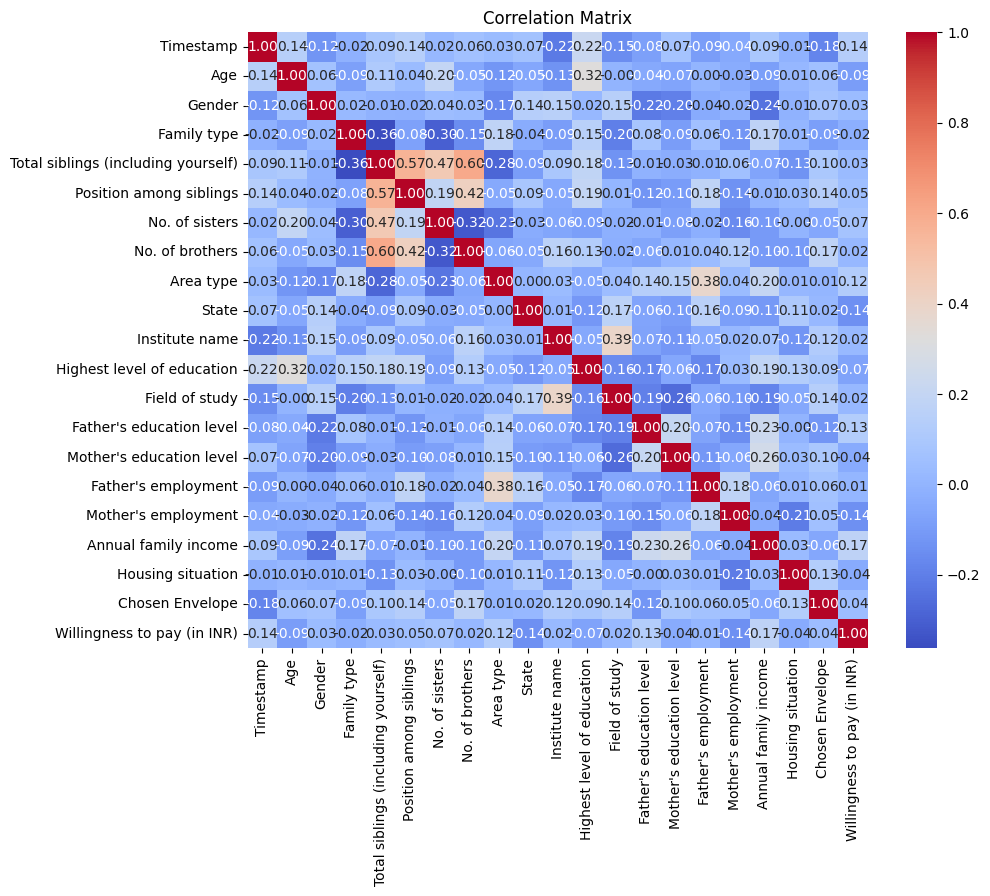

                                     Timestamp       Age    Gender  \
Timestamp                             1.000000  0.143686 -0.124154   
Age                                   0.143686  1.000000  0.063376   
Gender                               -0.124154  0.063376  1.000000   
Family type                          -0.015841 -0.085405  0.021802   
Total siblings (including yourself)   0.089528  0.114292 -0.006056   
Position among siblings               0.141282  0.036556 -0.015407   
No. of sisters                        0.017039  0.196088  0.041317   
No. of brothers                       0.059605 -0.053431  0.026734   
Area type                             0.032973 -0.119957 -0.165895   
State                                 0.068547 -0.054391  0.142551   
Institute name                       -0.216891 -0.132207  0.152344   
Highest level of education            0.218324  0.324108  0.018685   
Field of study                       -0.152788 -0.003581  0.146807   
Father's education l

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

In [18]:
correlation_matrix.shape

(21, 21)

In [19]:
correlation_matrix.iloc[-1,:].sort_values(ascending=False)

Willingness to pay (in INR)            1.000000
Annual family income                   0.170147
Timestamp                              0.137151
Father's education level               0.128129
Area type                              0.122414
No. of sisters                         0.070459
Position among siblings                0.051365
Chosen Envelope                        0.041471
Gender                                 0.034181
Total siblings (including yourself)    0.026788
Institute name                         0.024300
Field of study                         0.016919
No. of brothers                        0.016369
Father's employment                    0.009472
Family type                           -0.022656
Housing situation                     -0.039172
Mother's education level              -0.039358
Highest level of education            -0.070846
Age                                   -0.092353
Mother's employment                   -0.139529
State                                 -0

### Factors affecting willingness to pay are:
Annual family income  
Timestamp  
Father's education level  
Area type  
No of sisters  
Position among siblings  

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from statsmodels.tools import add_constant
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import accuracy_score


df['Willingness to pay (in INR)'] = df['Willingness to pay (in INR)'].apply(lambda x: 'High' if x >= 1000 else 'Low')
df.head()



,Timestamp,Age,Gender,Family type,Total siblings (including yourself),Position among siblings,No. of sisters,No. of brothers,Area type,State,...,Highest level of education,Field of study,Father's education level,Mother's education level,Father's employment,Mother's employment,Annual family income,Housing situation,Chosen Envelope,Willingness to pay (in INR)
0,0.0,21.0,1.0,0.0,2.0,2.0,1.0,0.0,2.0,12.0,...,1.0,7.0,6.0,6.0,6.0,10.0,3378750.0,3.0,5.0,High
1,1.0,20.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,2.0,...,1.0,7.0,4.0,5.0,4.0,12.0,1800000.0,3.0,5.0,Low
2,2.0,19.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,13.0,...,0.0,7.0,6.0,9.0,4.0,11.0,1500000.0,3.0,1.0,Low
3,3.0,20.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,9.0,...,0.0,7.0,4.0,1.0,4.0,12.0,800000.0,3.0,1.0,Low
4,4.0,22.0,1.0,0.0,3.0,1.0,2.0,0.0,1.0,1.0,...,0.0,7.0,6.0,0.0,4.0,12.0,1000000.0,2.0,3.0,Low


In [22]:
from sklearn.preprocessing import OrdinalEncoder

encoder1 = OrdinalEncoder()

df_column_reshaped = df['Willingness to pay (in INR)'].values.reshape(-1, 1)

encoder1.fit(df_column_reshaped)

df['Willingness to pay (in INR)'] = encoder1.transform(df_column_reshaped)


In [24]:
X = df.drop([ 'Willingness to pay (in INR)'], axis=1)
y = df['Willingness to pay (in INR)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
df.head()

,Timestamp,Age,Gender,Family type,Total siblings (including yourself),Position among siblings,No. of sisters,No. of brothers,Area type,State,...,Highest level of education,Field of study,Father's education level,Mother's education level,Father's employment,Mother's employment,Annual family income,Housing situation,Chosen Envelope,Willingness to pay (in INR)
0,0.0,21.0,1.0,0.0,2.0,2.0,1.0,0.0,2.0,12.0,...,1.0,7.0,6.0,6.0,6.0,10.0,3378750.0,3.0,5.0,0.0
1,1.0,20.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,2.0,...,1.0,7.0,4.0,5.0,4.0,12.0,1800000.0,3.0,5.0,1.0
2,2.0,19.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,13.0,...,0.0,7.0,6.0,9.0,4.0,11.0,1500000.0,3.0,1.0,1.0
3,3.0,20.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,9.0,...,0.0,7.0,4.0,1.0,4.0,12.0,800000.0,3.0,1.0,1.0
4,4.0,22.0,1.0,0.0,3.0,1.0,2.0,0.0,1.0,1.0,...,0.0,7.0,6.0,0.0,4.0,12.0,1000000.0,2.0,3.0,1.0


In [25]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
logreg_pred = logreg_model.predict(X_test)

svm_conf_matrix = confusion_matrix(y_test, svm_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

svm_f1 = f1_score(y_test, svm_pred)
dt_f1 = f1_score(y_test, dt_pred)
logreg_f1 = f1_score(y_test, logreg_pred)

X_train_const = add_constant(X_train)
logit_model = Logit(y_train, X_train_const)
result = logit_model.fit()
logreg_aic = result.aic
logreg_bic = result.bic

print("Support Vector Machine:")
print("Confusion Matrix:")
print(svm_conf_matrix)
print("F1 Score:", svm_f1)

print("\nDecision Tree:")
print("Confusion Matrix:")
print(dt_conf_matrix)
print("F1 Score:", dt_f1)

print("\nLogistic Regression:")
print("Confusion Matrix:")
print(logreg_conf_matrix)
print("F1 Score:", logreg_f1)
print("AIC:", logreg_aic)
print("BIC:", logreg_bic)


/home/ayush/Downloads/test/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: pos_label=High is not a valid label. It should be one of [0.0, 1.0]